# matplotlib 구간 강조

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True 

In [2]:
import pandas as pd
from datetime import datetime
from pandas_datareader import data

start = datetime(2016, 1, 1)
end = datetime(2016, 3, 31)

df = data.get_data_yahoo('^KS11', start, end)

# 특정 구간 표시

참조
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axvspan
* http://matplotlib.org/examples/pylab_examples/axhspan_demo.html

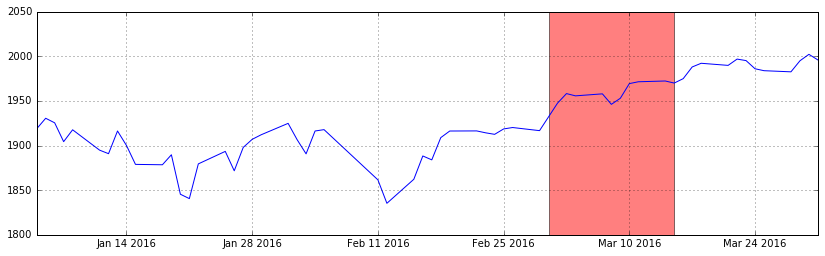

In [4]:
# 특정 날짜의 구간을 강조하여 표시

plt.plot(df['Adj Close'])

start = datetime(2016, 3, 1)
end = datetime(2016, 3, 15)

plt.axvspan(start, end, facecolor='red', alpha=0.5)
plt.show()

# 조건에 해당하는 구간을 강조
* 전일대비 등락률이 연속해서 상승하는 구간을 하일라이트
* 각 구간을 튜플 리스트 (start, end)로 생성
* 각 구간을 axvspan()로 하일라이트 

In [4]:

df['Change'] = df['Adj Close'].pct_change()

range_list = []

start = end = df.index[0]
prev_val = 0

for inx, val in df['Change'].iteritems():
    if val * prev_val < 0 and val < 0:
        end = prev_inx
        range_list.append((start, end))
    elif val * prev_val < 0 and val > 0:
        start = inx

    prev_inx = inx
    prev_val = val

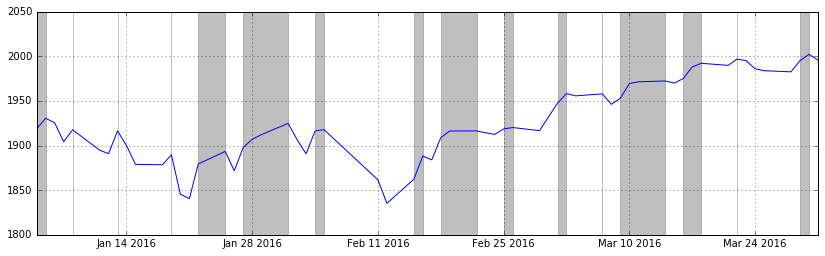

In [5]:
plt.plot(df['Adj Close'])

for (start, end) in range_list:
    plt.axvspan(start, end, color='gray', alpha=0.5)